# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data Visualisation

In [3]:
train_data = pd.read_csv("../../inputs/train/train.csv").drop("Id", axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
test_data = pd.read_csv("../../inputs/test/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

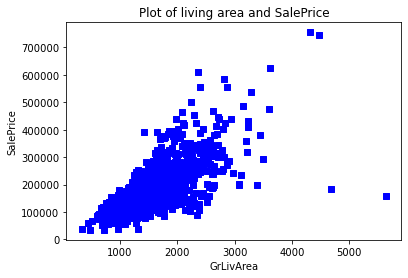

In [7]:
plt.scatter(train_data.GrLivArea, train_data.SalePrice, color='blue', marker='s')
plt.title("Plot of living area and SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

# The plot above indicates that as the living area increases, the sale price increases. However, there are two outliers in the above plot that does not fit into this criteria.

# The author of the dataset recommends removing houses with area greater than 4000 sqft.

In [8]:
train_data = train_data[train_data.GrLivArea < 4000]
train_data.shape

(1456, 80)

# Missing values in train data

In [9]:
cols_with_missing_train = [col for col in train_data.columns
                     if train_data[col].isnull().any()]
print(cols_with_missing_train)
print(len(cols_with_missing_train))

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
19


In [10]:
train_missing_cols = train_data[cols_with_missing_train].isnull().sum() / train_data.shape[0] * 100
train_missing_cols

LotFrontage     17.788462
Alley           93.750000
MasVnrType       0.549451
MasVnrArea       0.549451
BsmtQual         2.541209
BsmtCond         2.541209
BsmtExposure     2.609890
BsmtFinType1     2.541209
BsmtFinType2     2.609890
Electrical       0.068681
FireplaceQu     47.390110
GarageType       5.563187
GarageYrBlt      5.563187
GarageFinish     5.563187
GarageQual       5.563187
GarageCond       5.563187
PoolQC          99.656593
Fence           80.769231
MiscFeature     96.291209
dtype: float64

<AxesSubplot:>

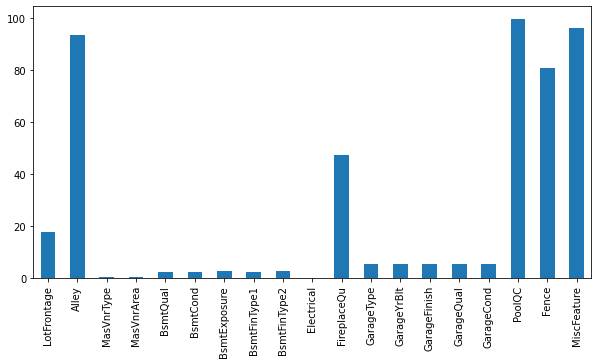

In [11]:
train_missing_cols.plot.bar(figsize=(10,5))

# Missing values in test data

In [12]:
cols_with_missing_test = [col for col in test_data.columns
                     if test_data[col].isnull().any()]
print(cols_with_missing_test)
print(len(cols_with_missing_test))

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
33


In [13]:
test_missing_cols = test_data[cols_with_missing_test].isnull().sum() / test_data.shape[0] * 100
test_missing_cols

MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64

<AxesSubplot:>

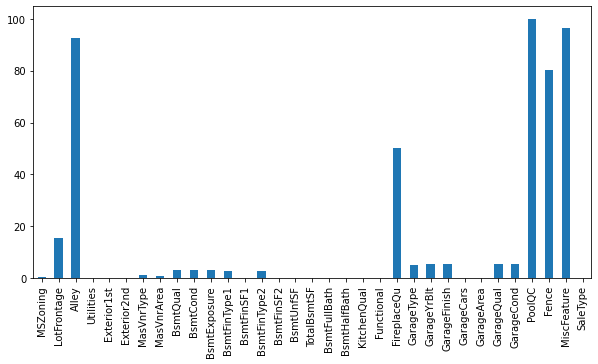

In [14]:
test_missing_cols.plot.bar(figsize=(10,5))

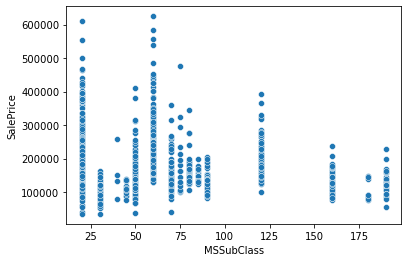

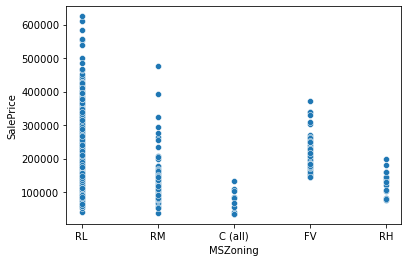

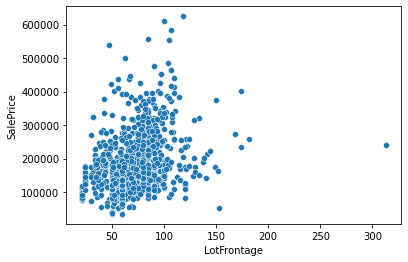

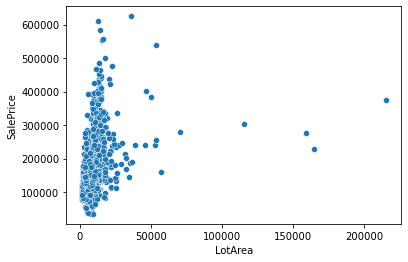

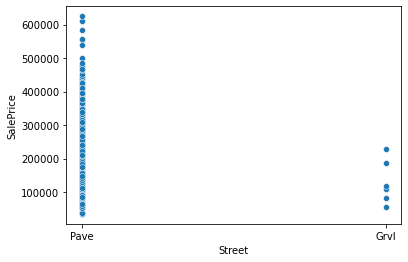

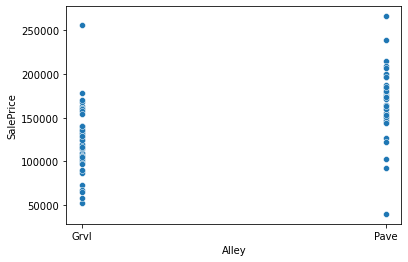

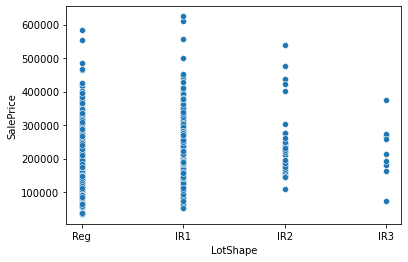

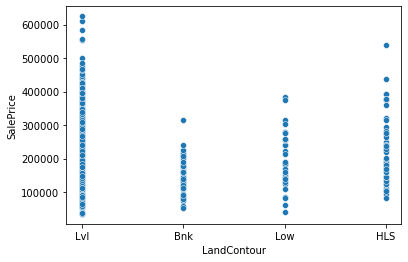

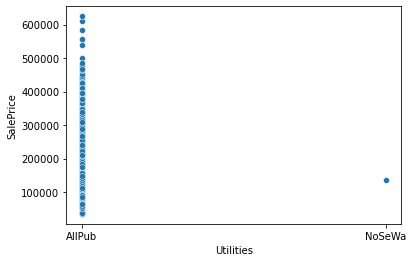

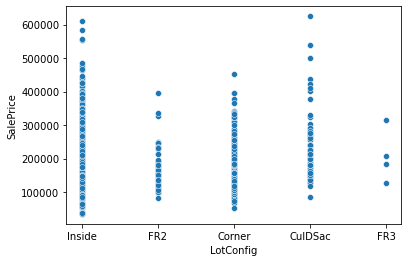

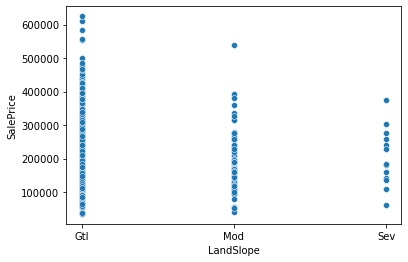

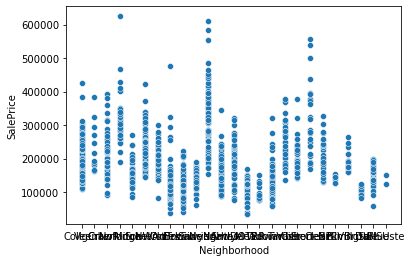

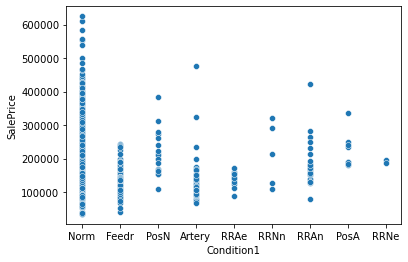

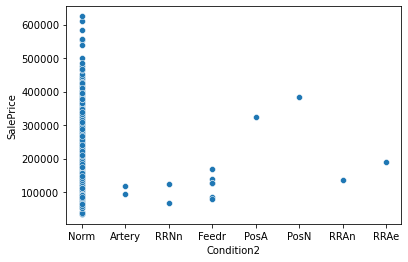

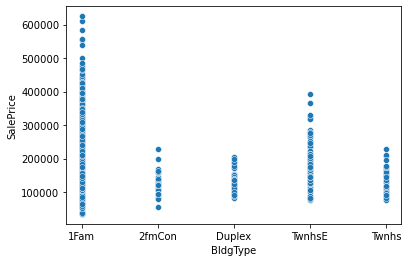

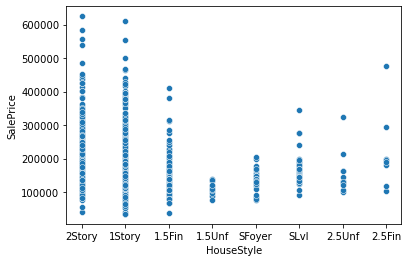

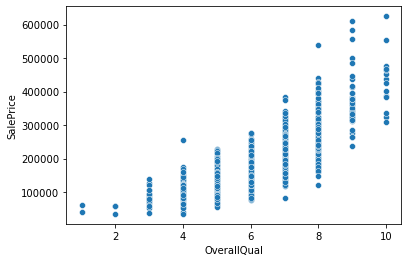

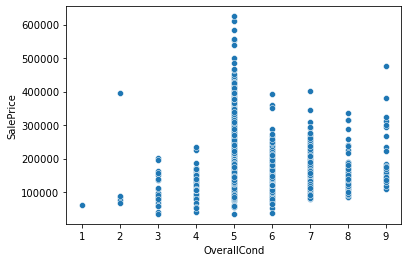

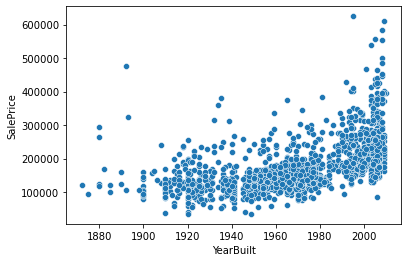

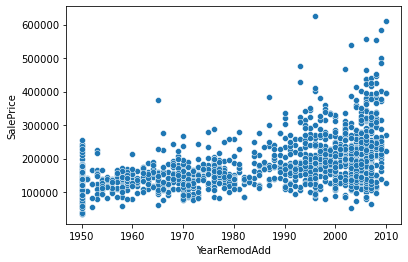

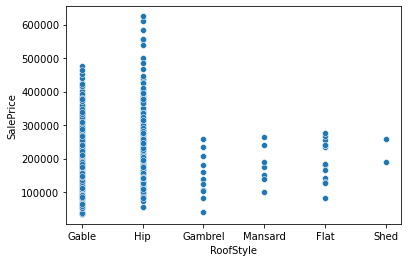

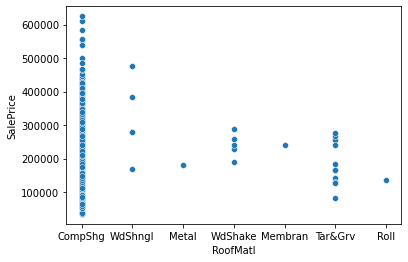

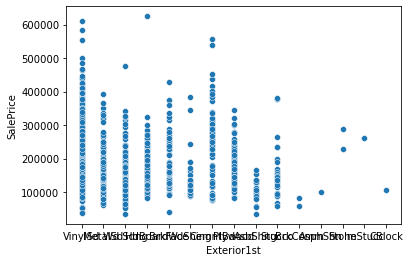

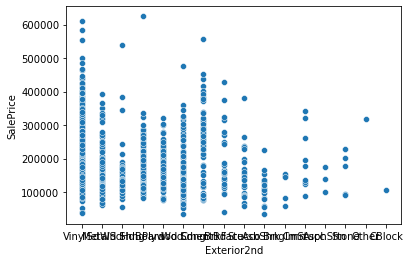

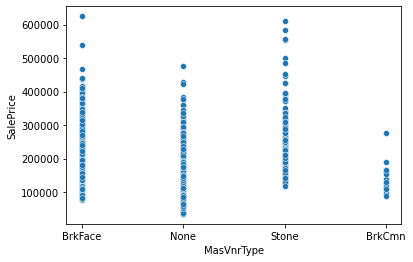

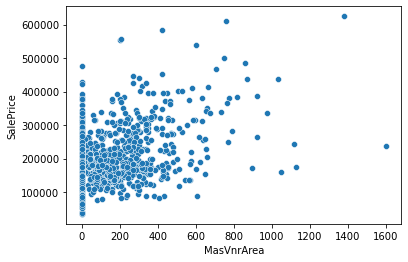

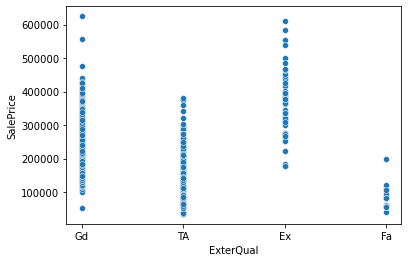

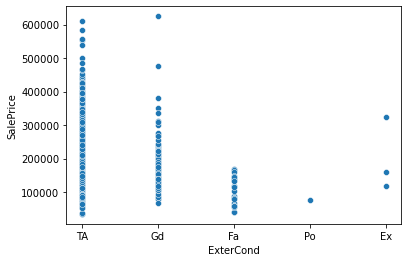

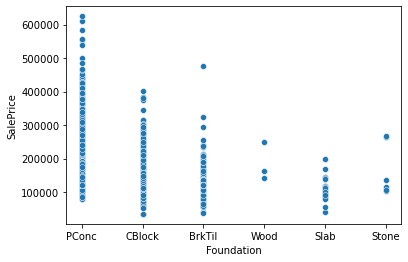

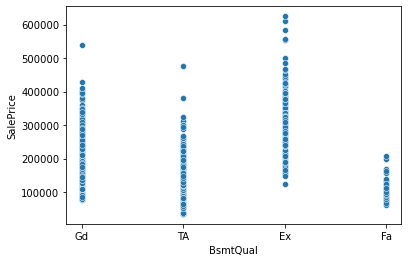

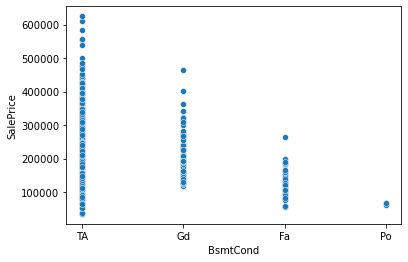

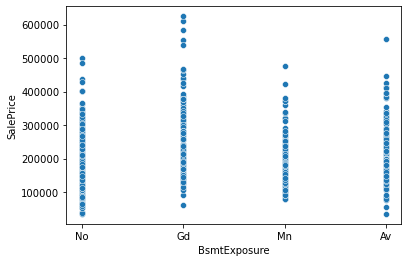

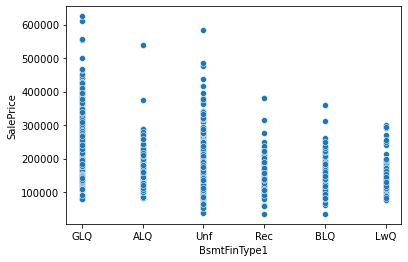

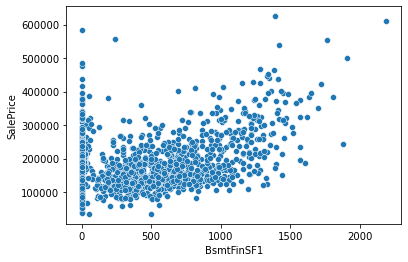

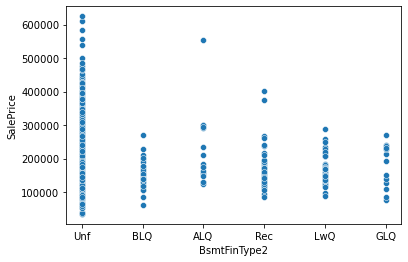

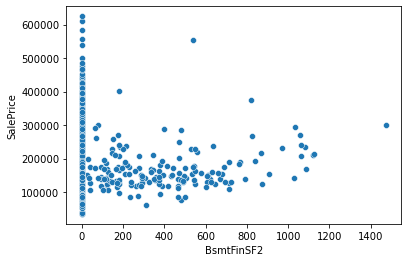

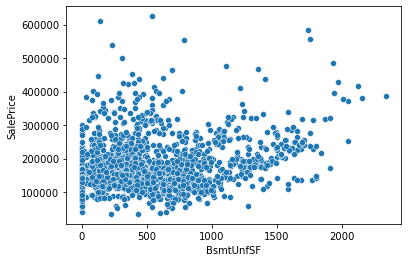

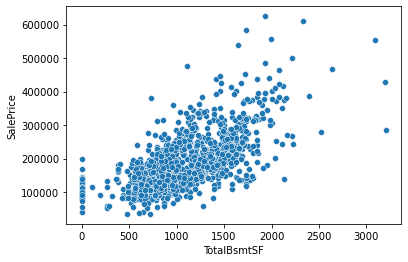

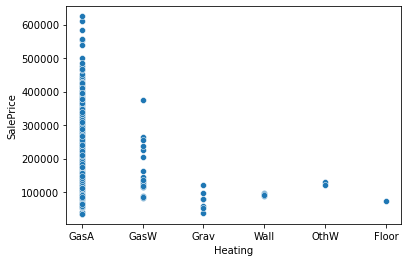

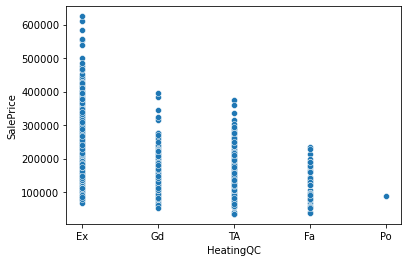

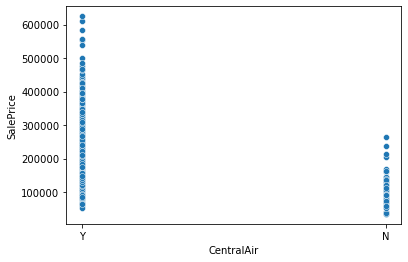

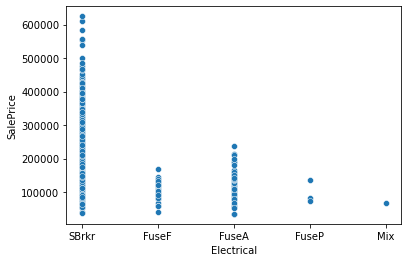

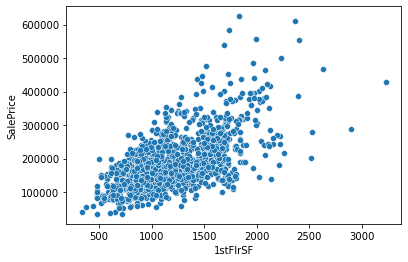

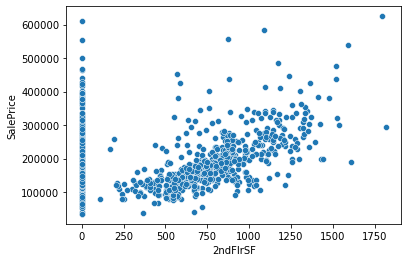

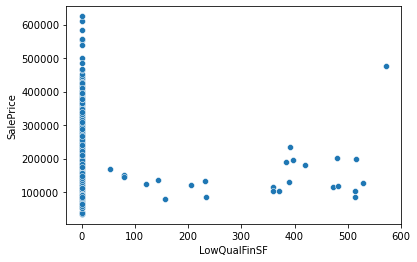

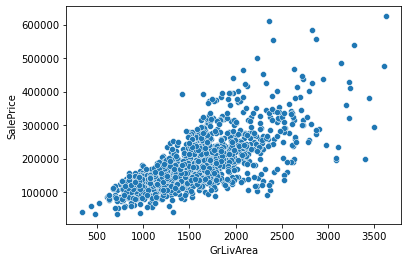

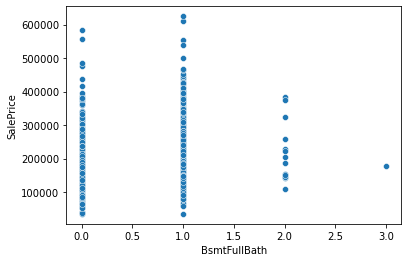

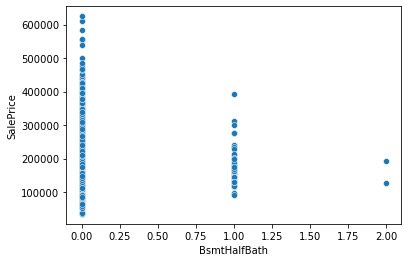

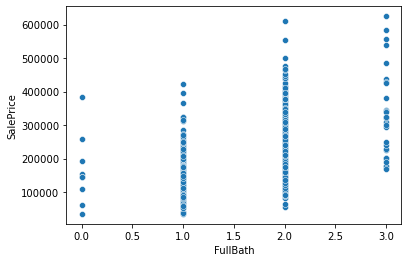

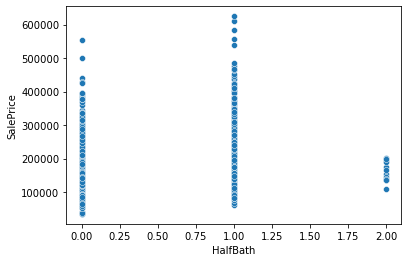

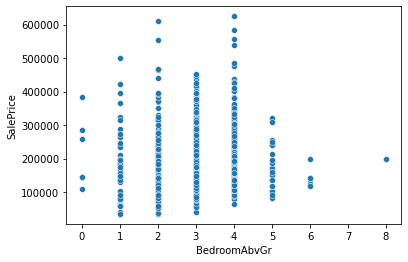

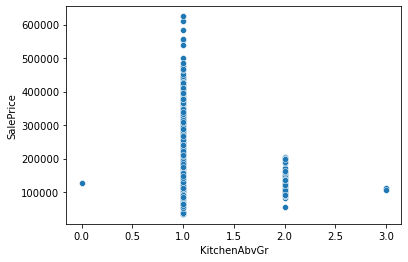

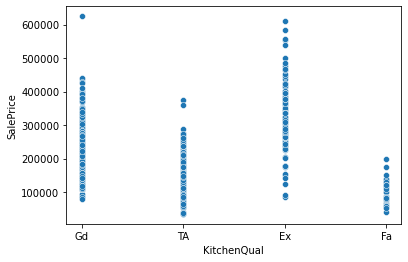

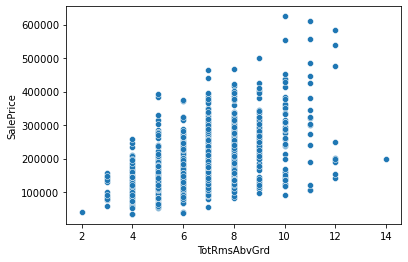

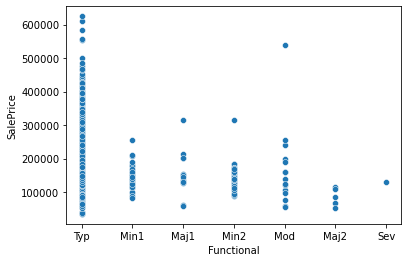

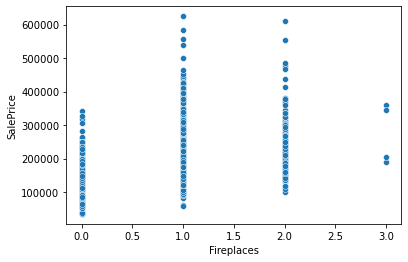

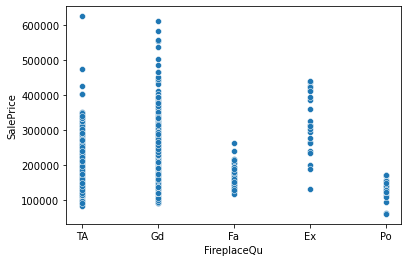

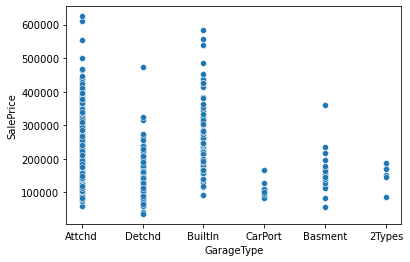

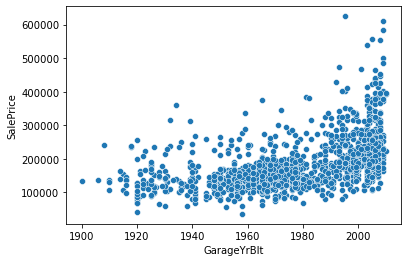

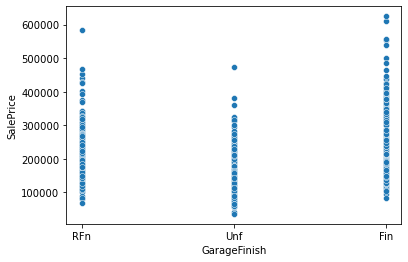

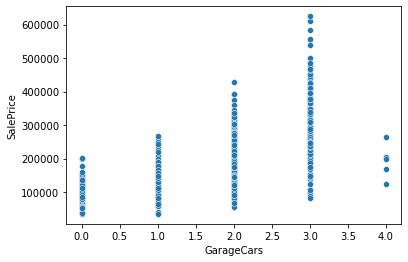

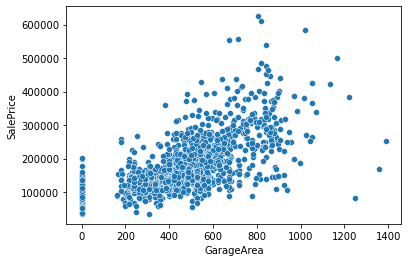

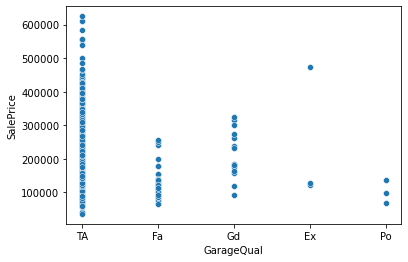

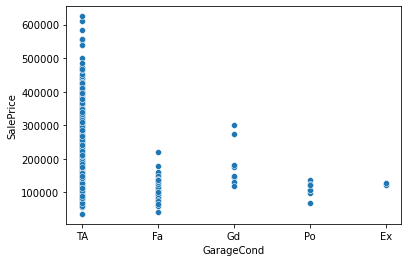

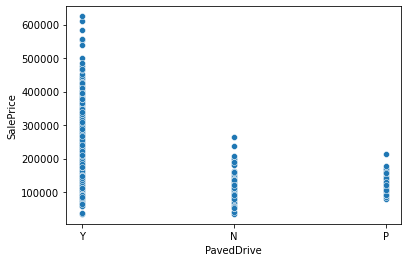

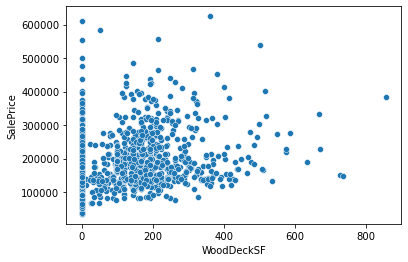

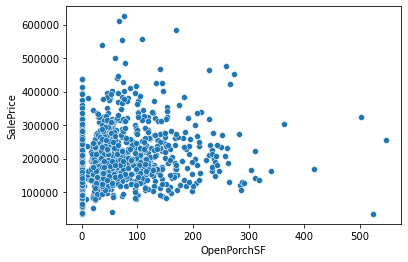

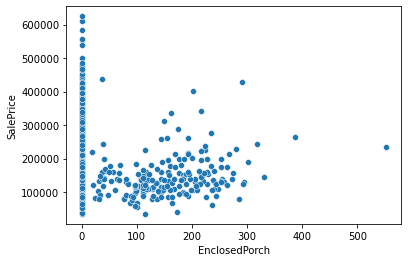

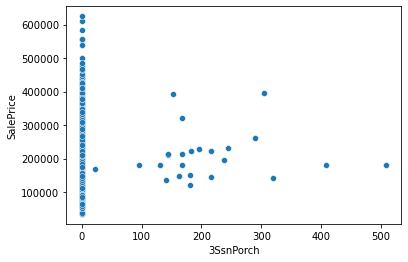

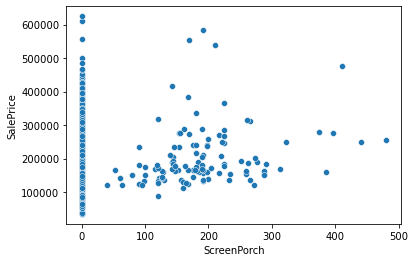

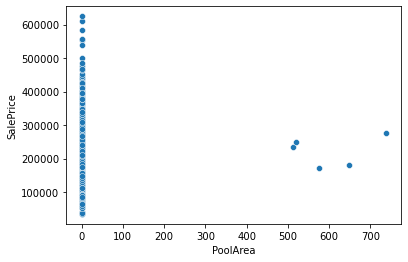

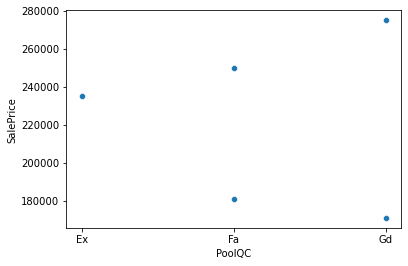

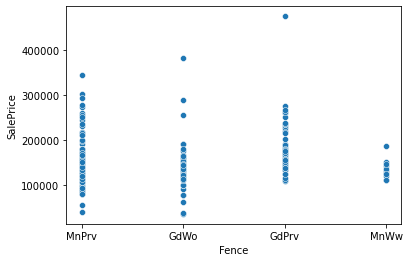

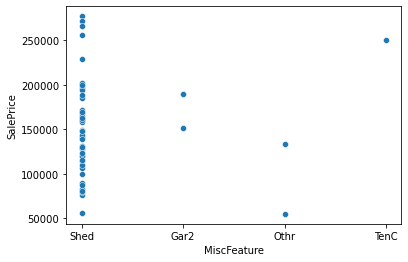

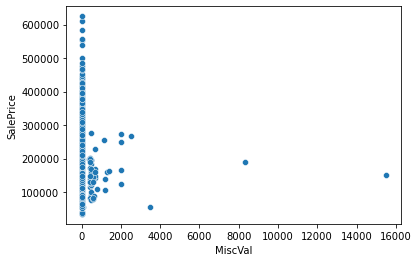

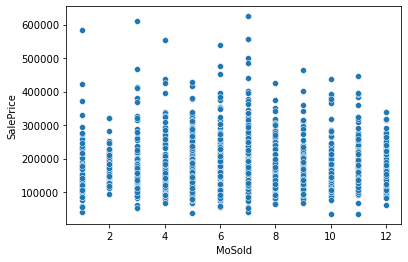

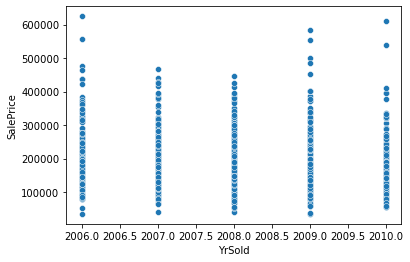

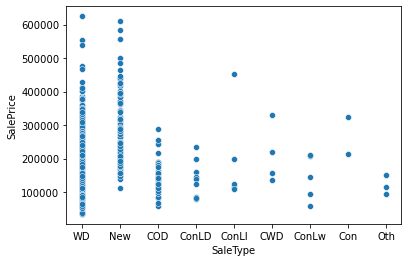

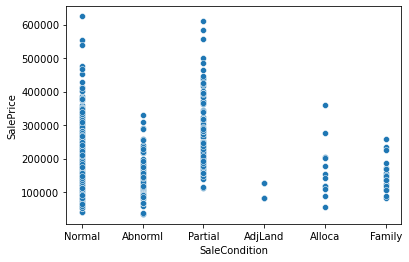

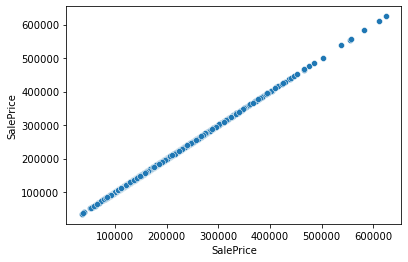

In [15]:
for col in train_data.columns:
    sns.scatterplot(x=train_data[col], y=train_data['SalePrice'])
    plt.show()

In [16]:
train_data['SalePrice'].nunique()

660

In [17]:
feature_set1=[]
feature_set2 = []
feature_set3=[]
feature_set4=[]
feature_set5=[]

for col in train_data.columns:
    if train_data[col].nunique() < 20:
        feature_set1.append(col)
    elif train_data[col].nunique() < 100:
        feature_set2.append(col)
    elif train_data[col].nunique() < 500:
        feature_set3.append(col)
    elif train_data[col].nunique() < 1000:
        feature_set4.append(col)
    else:
        feature_set5.append(col)
xaxis = [len(feature_set1), len(feature_set2), len(feature_set3), len(feature_set4)-1, len(feature_set5)]
yaxis = [20, 100, 500, 1000, 1056]

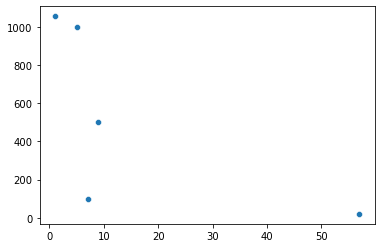

In [18]:
sns.scatterplot(x=xaxis, y=yaxis)
plt.show()

In [19]:
features = []
unique_values = []
for col in train_data.columns:
    if col!='SalePrice':
        features.append(col)
        unique_values.append(train_data[col].nunique())   

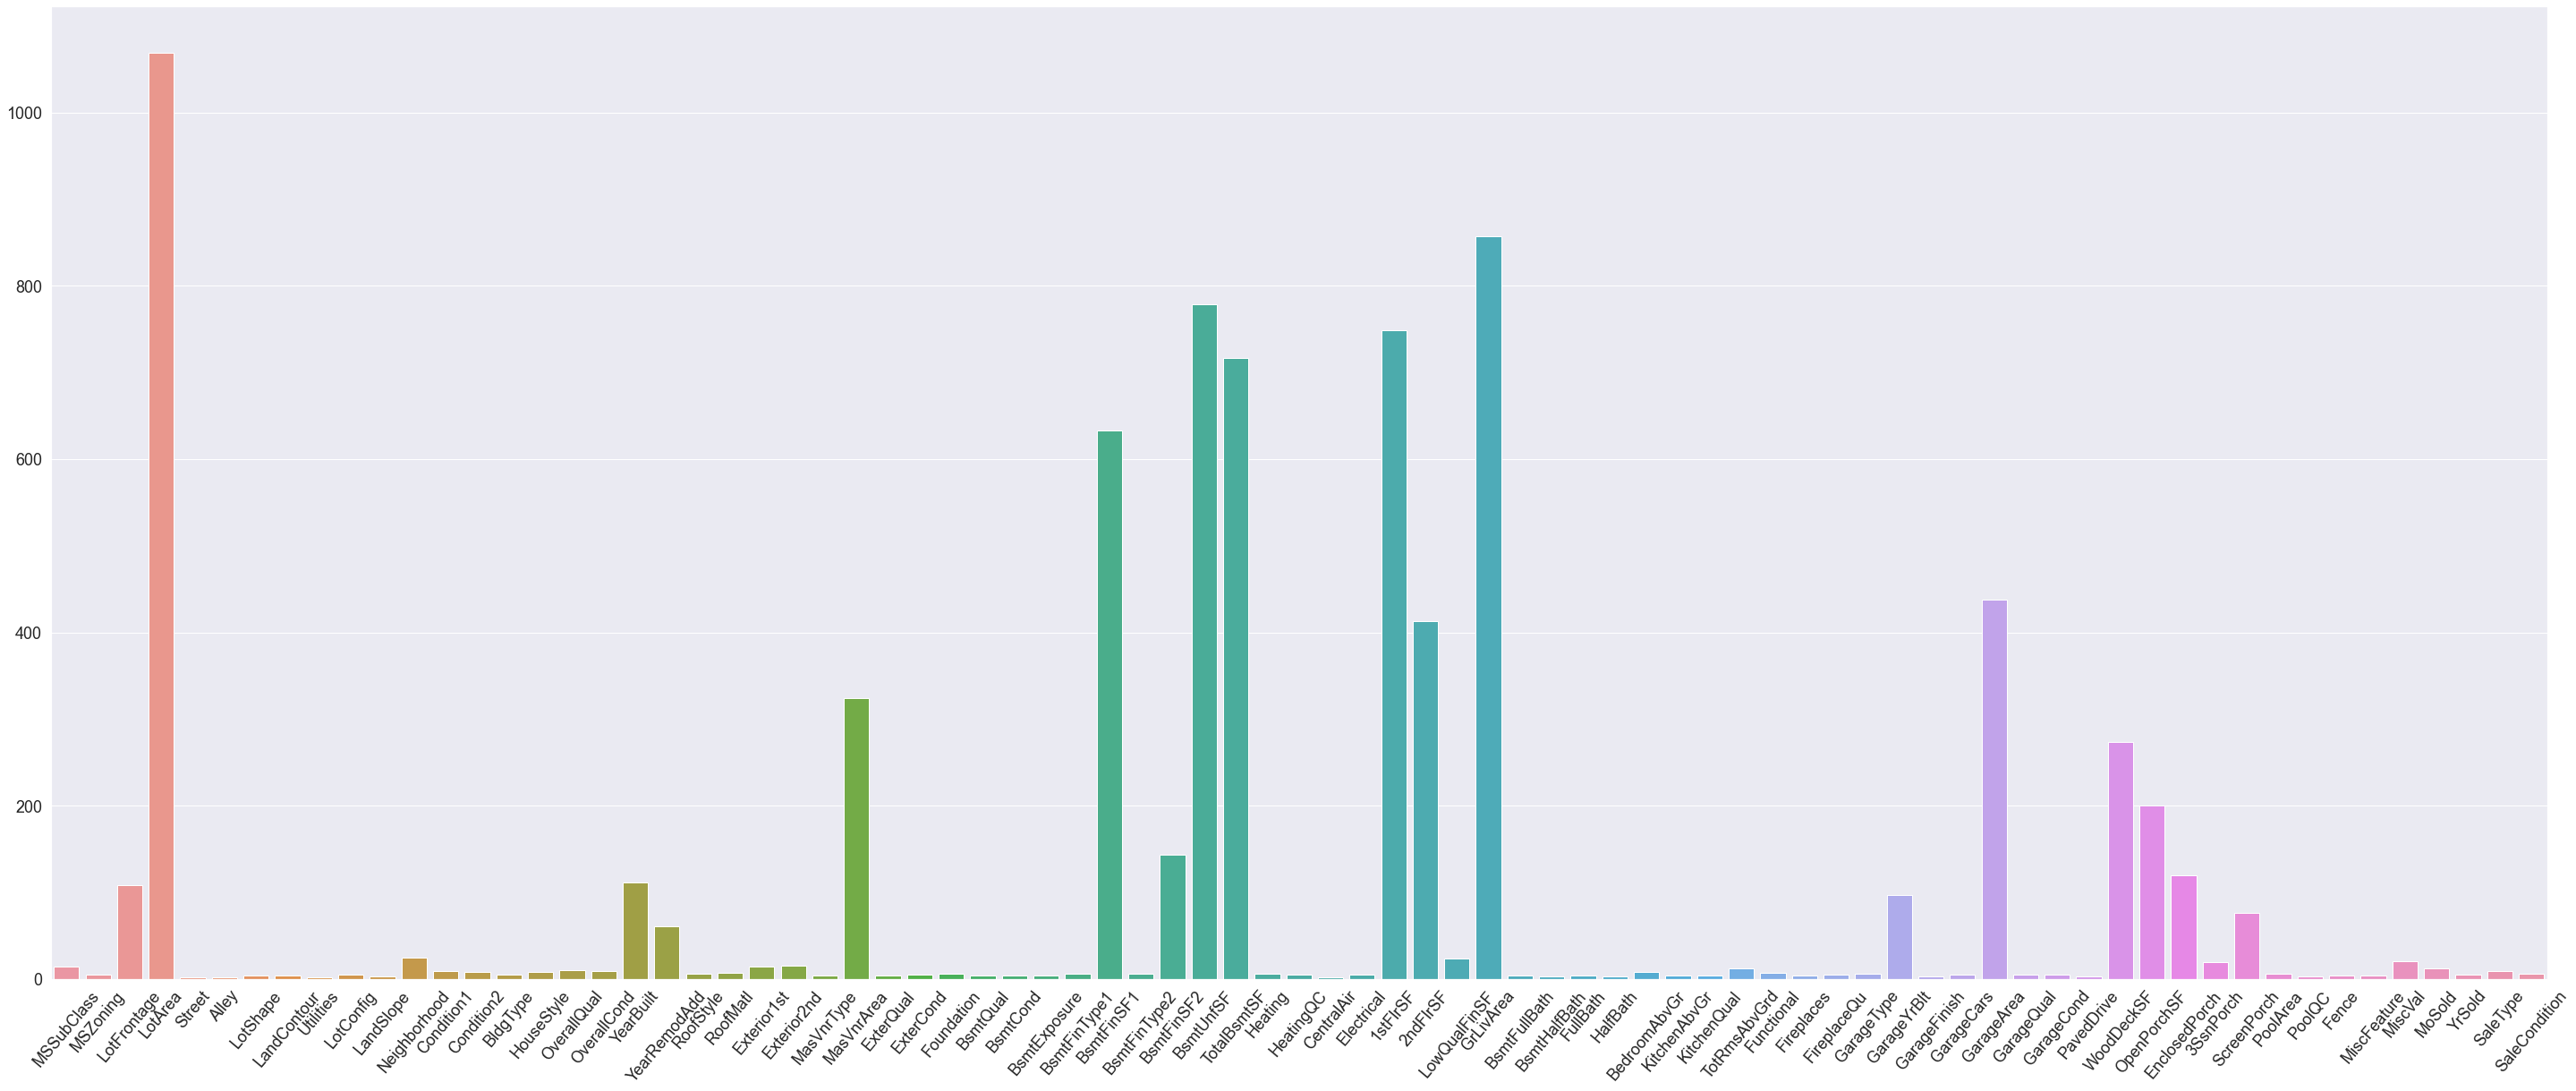

In [20]:
sns.set(rc = {'figure.figsize':(50,20)})
sns.barplot(x=features, y=unique_values)
plt.xticks(rotation=50, size=18)
plt.yticks(size=18)
plt.show()

# Correlation Matrix

<AxesSubplot:>

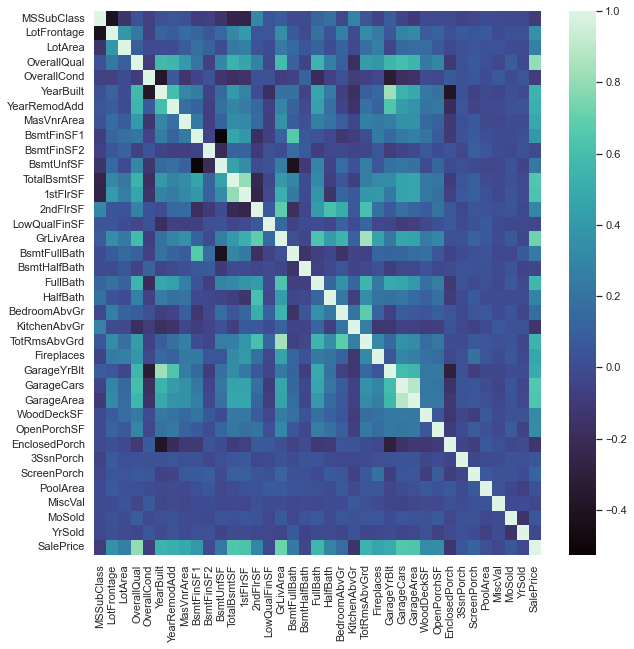

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_data.corr(), cmap="mako")

# Histogram of SalePrice

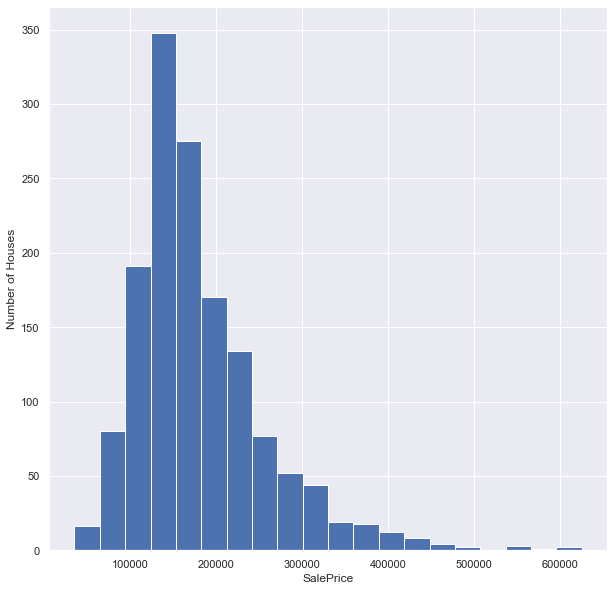

In [37]:
plt.figure(figsize=(10, 10))
plt.hist(train_data['SalePrice'], bins=20, histtype="barstacked")
plt.xlabel('SalePrice')
plt.ylabel('Number of Houses')
plt.show()